# Desafio 4

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [4]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [5]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


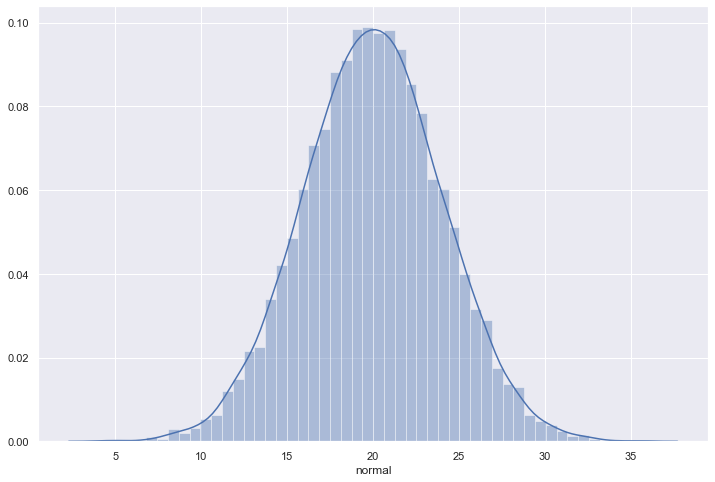

In [6]:
# Sua análise da parte 1 começa aqui.
sns.distplot(dataframe['normal'])

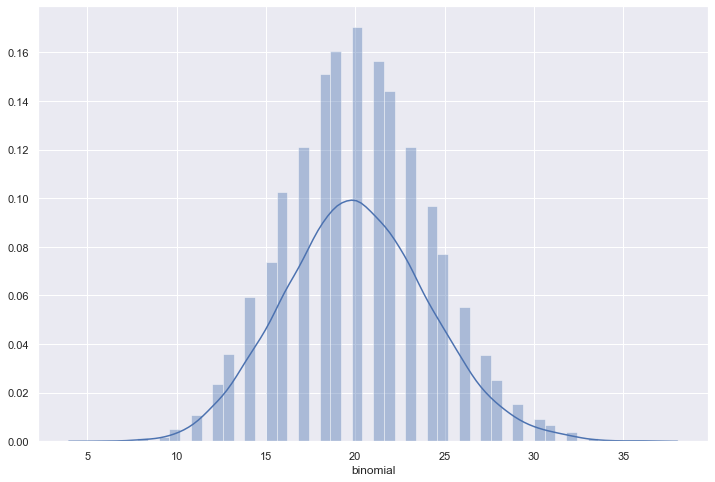

In [7]:
sns.distplot(dataframe['binomial'])

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [8]:
def q1():
    quartil_diff = [(quartil['normal'] - quartil['binomial']).round(3) for idx, quartil in dataframe.describe().iloc[4:7].iterrows()]
    return tuple(quartil_diff)

Para refletir:

* Você esperava valores dessa magnitude?
Não. Eu esperaria uam diferença maior entre quartis.

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

Valores próximos assim ocorrem pois média, desvio padrão, curstose, etc são muito semelhantes. Para a binomial, média = n * p = 100 * 0.2 = 20 = média da distribuição normal.

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [9]:
def q2():
    df_mean = dataframe['normal'].mean()
    df_std = dataframe['normal'].std()
    
    interval = [df_mean - df_std, df_mean + df_std]
    ecdf = ECDF(dataframe['normal'])
    f = lambda x: ecdf(x)
    
    return float(( f(interval[1]) - f(interval[0]) ).round(3))

Text(0.5, 1.0, 'CDF')

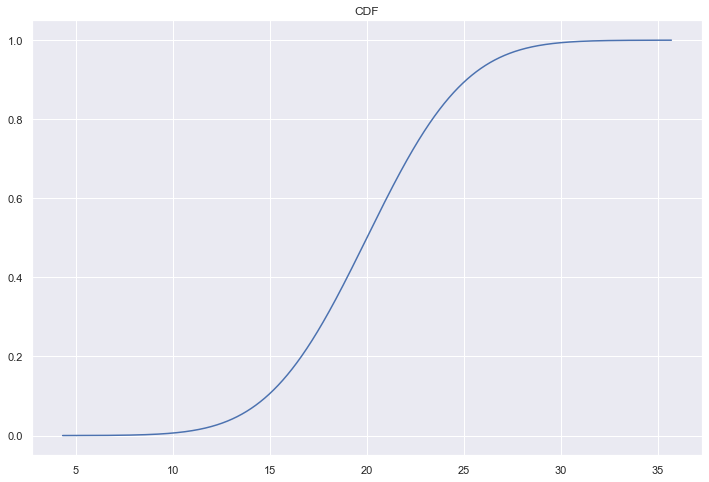

In [10]:
#plotting CDF
x = np.linspace(dataframe['normal'].min(), dataframe['normal'].max(), len(dataframe))
f = lambda x: sct.norm.cdf(x, loc = 20, scale = dataframe['normal'].std())
sns.lineplot(x, f(x)).set_title('CDF')

Para refletir:

* Esse valor se aproxima do esperado teórico?
Sim! O valor teórico é de 68.27% e nosso valor arredondado é de 0.683
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.
2s = 0.954 / 
3s = 0.977 

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [11]:
def q3():
    m_norm, v_norm = dataframe['normal'].mean(), pow(dataframe['normal'].std(), 2)
    m_binom, v_binom = dataframe['binomial'].mean(), pow(dataframe['binomial'].std(), 2)
    
    return tuple( [(m_binom-m_norm).round(3), (v_binom-v_norm).round(3)] )

Para refletir:

* Você esperava valore dessa magnitude? A média sim, pois a média da dist normal é semelhante a n*p da binomial - 20 (ver questão 1)
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`? A média irá mudar proporcionalmente. Se testarmos 10 vezes mais testes - n = 1000 -, a média do número de eventos com probabilidade 0.2 de acontecer irá para 200.

## Parte 2

### _Setup_ da parte 2

In [12]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [13]:
# Sua análise da parte 2 começa aqui.
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [14]:
#standardization by z-score
false_pulsar = pd.DataFrame(stars[stars['target'] == 0])
mean_profile_m, mean_profile_std = false_pulsar['mean_profile'].mean(), false_pulsar['mean_profile'].std()
false_pulsar['false_pulsar_mean_profile_standardized'] = (false_pulsar['mean_profile'] - mean_profile_m) / mean_profile_std

In [15]:
false_pulsar.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,false_pulsar_mean_profile_standardized
count,16258.000000,16258.000000,16258.000000,16258.000000,16258.000000,16258.000000,16258.000000,16258.000000,1.625800e+04
mean,116.561250,47.339228,0.210467,0.380910,8.863607,23.288241,8.862728,113.622766,2.355656e-16
std,17.475456,6.182773,0.334598,1.027788,24.412119,16.651906,4.238750,106.724766,1.000000e+00
min,17.210938,28.698714,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,-5.685134e+00
25%,105.251953,43.384235,0.008661,-0.221946,1.857023,14.138412,6.615354,47.572648,-6.471532e-01
50%,117.257812,47.485141,0.186679,0.124232,2.635033,17.618244,8.760276,90.675950,3.985947e-02
75%,128.281250,51.315334,0.392912,0.663436,4.227216,24.519289,10.935272,145.833002,6.706549e-01
max,192.617188,98.778911,4.785786,24.872429,223.392140,110.642211,34.539844,1191.000837,4.352157e+00


Text(0.5, 1.0, 'PDF')

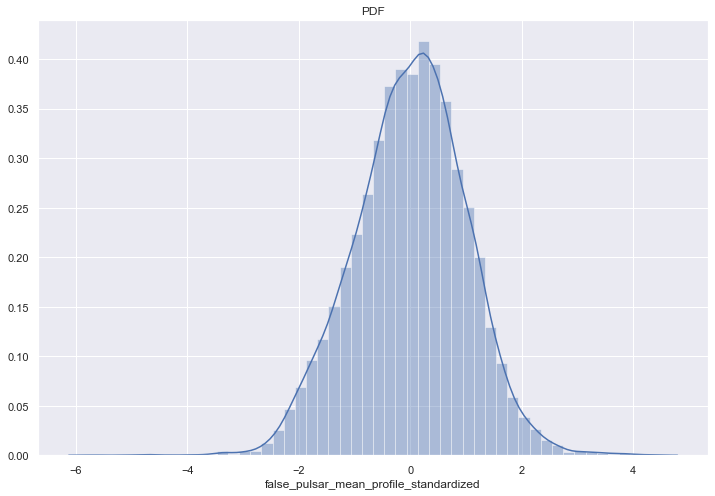

In [16]:
sns.distplot(false_pulsar['false_pulsar_mean_profile_standardized']).set_title('PDF')

In [22]:
def q4():
    quantils = [sct.norm.ppf(q, loc = 0, scale = 1) for q in [0.80, 0.90, 0.95]]
    print(quantils)
    ecdf = ECDF(false_pulsar['false_pulsar_mean_profile_standardized'])
    
    return tuple([prob.round(3) for prob in ecdf(quantils)])

Para refletir:

* Os valores encontrados fazem sentido? Sim, as probabilidades estão próximas aos valores dos quantis teóricos, ligeiramente mais altas.
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`? 80.6% de prob que a var seja <= 0.841621...e assim por diante. 

Text(0.5, 1.0, 'ECDF x CDF')

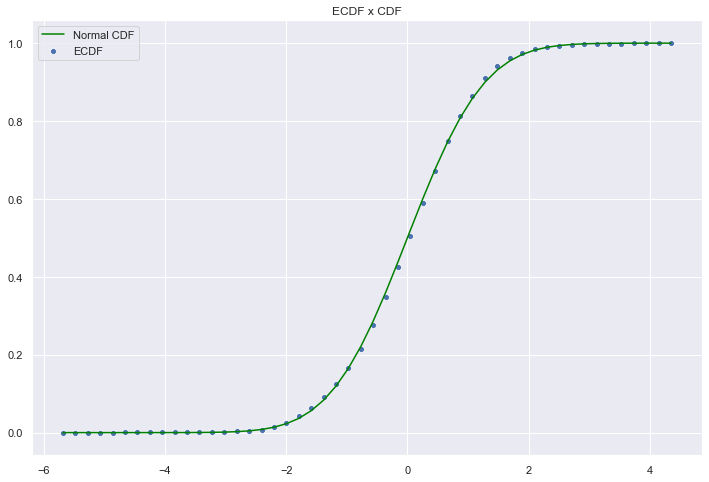

In [53]:
#plotting ECDF x CDF
ecdf = ECDF(false_pulsar['false_pulsar_mean_profile_standardized'])
x = np.linspace(false_pulsar['false_pulsar_mean_profile_standardized'].min(), false_pulsar['false_pulsar_mean_profile_standardized'].max())
sns.scatterplot(x, ecdf(x), label = 'ECDF')

f = lambda x: sct.norm.cdf(x, loc = 0, scale = 1)
sns.lineplot(x, f(x), color = 'green', label = 'Normal CDF').set_title('ECDF x CDF')

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [21]:
def q5():
    quantils = [0.25, 0.50, 0.75]
    quantils_fpmps = list(false_pulsar['false_pulsar_mean_profile_standardized'].quantile(quantils))
    quantils_norm = [sct.norm.ppf(quantil, loc = 0, scale = 1) for quantil in quantils]
    
    return tuple([(quantils_fpmps[a] - quantils_norm[a]).round(3) for a in [0, 1, 2]])

Para refletir:

* Os valores encontrados fazem sentido? Sim, há pouca diferença.
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`? O primeiro e o segundo quartil é ligeiramente maior na dist da variável, enquanto o terceiro ligeiramente menor.
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem. 